## DBSCAN
### PUCMINAS 

Nahari Terena

In [1]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, plot_confusion_matrix, plot_roc_curve, silhouette_score
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


warnings.filterwarnings('ignore')
from sklearn.exceptions import ConvergenceWarning

In [2]:
data = 'C://Users//Olnalu//Desktop//Nahari//PUCMINAS//Dados//base_final.csv'

df = pd.read_csv(data, sep = ";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22442 entries, 0 to 22441
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   NUMERODO    22442 non-null  int64
 1   IND_RC      22442 non-null  int64
 2   QTDGESTANT  22442 non-null  int64
 3   QTDFILVIVO  22442 non-null  int64
 4   GESTACAO    22442 non-null  int64
 5   PESO        22442 non-null  int64
 6   QTDPARTNOR  22442 non-null  int64
 7   TPROBSON    22442 non-null  int64
 8   PARIDADE    22442 non-null  int64
 9   CONSULTAS   22442 non-null  int64
 10  KOTELCHUCK  22442 non-null  int64
 11  IDADEMAE    22442 non-null  int64
 12  QTDFILMORT  22442 non-null  int64
 13  IDADE       22442 non-null  int64
 14  CONSPRENAT  22442 non-null  int64
 15  QTDPARTCES  22442 non-null  int64
dtypes: int64(16)
memory usage: 2.7 MB


In [4]:
df.drop(['NUMERODO', 'IND_RC'], axis=1, inplace=True)

## Normalizando os valores

In [5]:
ms = MinMaxScaler()
cols = df.columns

X = ms.fit_transform(df)
X = pd.DataFrame(X, columns = [cols])

In [6]:
X.head()

,QTDGESTANT,QTDFILVIVO,GESTACAO,PESO,QTDPARTNOR,TPROBSON,PARIDADE,CONSULTAS,KOTELCHUCK,IDADEMAE,QTDFILMORT,IDADE,CONSPRENAT,QTDPARTCES
0,0.066667,0.071429,0.8,0.472464,0.000000,0.4,1.0,0.375,0.500,0.103448,0.0,1.0,0.080808,0.025
1,0.066667,0.071429,0.2,0.070290,0.033333,0.7,1.0,0.250,0.250,0.206897,0.0,0.0,0.040404,0.000
2,0.066667,0.071429,0.4,0.127536,0.000000,0.9,1.0,0.250,0.375,0.114943,0.0,0.0,0.060606,0.025
3,0.000000,0.000000,0.6,0.350000,0.000000,0.9,0.0,0.250,0.250,0.091954,0.0,0.0,0.050505,0.000
4,0.066667,0.071429,0.6,0.469565,0.033333,0.9,1.0,0.250,1.000,0.160920,0.0,1.0,0.050505,0.000


## Quantidade de clusters

Text(0.5, 1.0, 'K-Distance Graph')

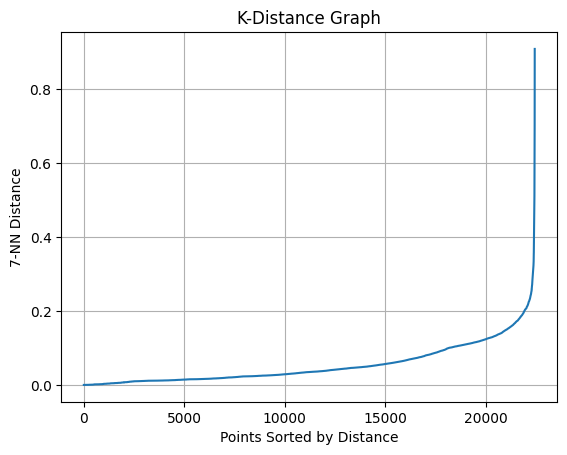

In [6]:
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(X)
distances, indices = knn.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph')

In [7]:
scaler = StandardScaler()
df_clust_scaled = scaler.fit_transform(X)

for eps in [i/10 for i in range(2,5)]:
    for min_samples in range (7,9):
        print(f'\neps {eps}')
        print(f'\min samples {min_samples}')
        
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        labels = dbscan.fit_predict(df_clust_scaled)
        score = silhouette_score(df_clust_scaled, labels)
        
        print(f'clusters present: {np.unique(labels)}')
        print(f'clusters sizes: {np.bincount(labels + 1)}')
        print(f'Silhouette Score: {score}')


eps 0.2
\min samples 7
clusters present: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92]
clusters sizes: [19696    13   177    10   138    35    19   188   118   436    14    11
    87     7    45    28     9    25    17   136   142    16    91    21
    15     8    12    23    18    43    28    10    10    42    10    16
    51     9    31    27    20    11    24    36     7     9    11    35
     8    14    10     9    19    11    19    13    16    17    13    11
    18    10     8    12     4     7     7    11    14    13    13     7
     7     7     8     7     7     8     7    18    10    11     8     4
     7    10     7     7     5     8     7     8     7     5]
Silhouette Score: -0.44953245540634634

eps 0.2
\min samples 8
clusters present: [

In [9]:
db = DBSCAN(eps = 0.4, min_samples = 7).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Número de Clusters : ', n_clusters_)
print('Número de Outliers : ', n_noise_)

Número de Clusters :  25
Número de Outliers :  51


In [10]:
labels = dbscan.fit_predict(df_clust_scaled)
df['Class'] = labels

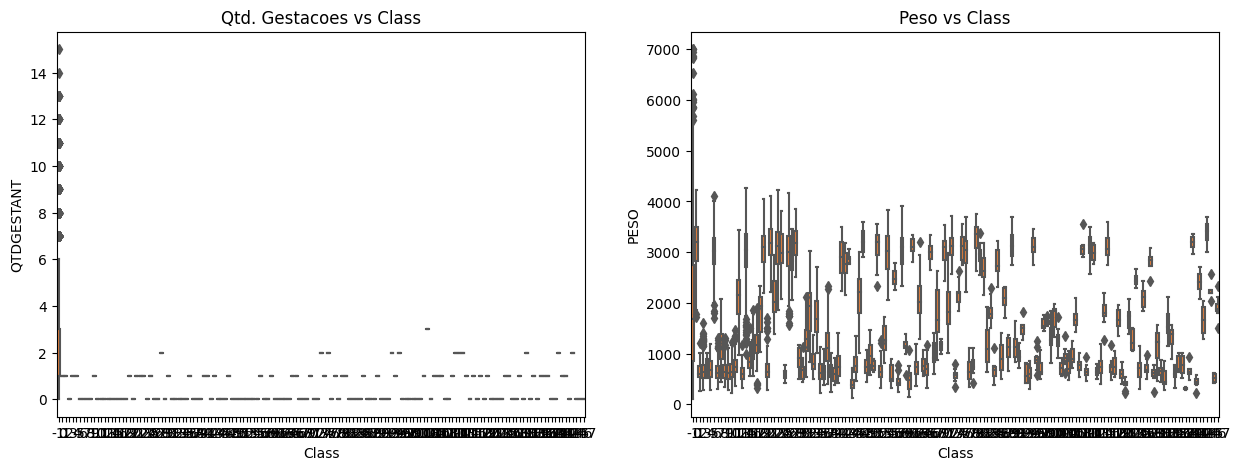

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'QTDGESTANT', data  = df, color = '#FF781F');
plt.title('Qtd. Gestacoes vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'PESO', data  = df, color = '#FF781F');
plt.title('Peso vs Class')

plt.show()